In [1]:
# project: p10
# submitter: hko26
# partner: yeo9

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import time, requests, os, json, csv
import pandas as pd
from pandas import DataFrame, Series

In [4]:
def download(filename, url):
    # We do not download again if the file already exists
    if os.path.exists(filename):
        return (str(filename) + " already exists!")

    # TODO: Write the code to download the file from URL
    # and save it in `filename`
    else:
        r = requests.get(url)
        r.raise_for_status()
        data = r.text
        f = open(filename, "w", encoding = "utf-8")
        f.write(data)
        f.close()
        return (str(filename) + " created!")

In [5]:
download("countries.json", "https://raw.githubusercontent.com/msyamkumar/cs220-projects/master/spring20/p10/countries.json")

'countries.json already exists!'

In [6]:
countries = pd.read_json('countries.json')
countries.head()

,area,birth-rate,coastline,continent,country,death-rate,gdp-per-capita,infant-mortality,literacy,net-migration,phones,population,region
0,756950,15.23,0.85,South America,Chile,5.81,9900,8.80,"96,2",0.00,"213,0",16134219,LATIN AMER. & CARIB
1,665,17.80,24.21,Asia,Bahrain,4.14,16900,17.27,"89,1",1.05,"281,3",698585,NEAR EAST
2,22966,28.84,1.68,North America,Belize,5.72,4900,25.69,"94,1",0.00,"115,7",287730,LATIN AMER. & CARIB
3,582650,39.72,0.09,Africa,Kenya,14.02,1000,61.47,"85,1",-0.10,"8,1",34707817,SUB-SAHARAN AFRICA
4,11854,33.05,3.12,Australia,Marshall Islands,4.78,1600,29.45,"93,7",-6.04,"91,2",60422,OCEANIA


In [7]:
#Q1: How many countries do we have in our dataset?
countries['country'].count()

174

In [8]:
#Q2: what is the total population across all the countries in our dataset?
countries['population'].sum()

6261901793

In [9]:
download("capitals.json", "https://raw.githubusercontent.com/msyamkumar/cs220-projects/master/spring20/p10/capitals.json")

'capitals.json already exists!'

In [10]:
capitals = pd.read_json('capitals.json')
capitals.head()

,country,capital,latitude,longitude
0,Afghanistan,Kabul,34.516667,69.183333
1,Albania,Tirana,41.316667,19.816667
2,Algeria,Algiers,36.750000,3.050000
3,Anguilla,The Valley,18.216667,-63.050000
4,Argentina,Buenos Aires,-34.583333,-58.666667


In [11]:
#Q3: What are the capital names in capitals.json?
capital_series = capitals["capital"]
sorted(list(capital_series))

['Abu Dhabi',
 'Abuja',
 'Accra',
 'Addis Ababa',
 'Algiers',
 'Amman',
 'Amsterdam',
 'Ankara',
 'Antananarivo',
 'Apia',
 'Ashgabat',
 'Asmara',
 'Astana',
 'Asuncion',
 'Athens',
 'Baghdad',
 'Baku',
 'Bamako',
 'Bangkok',
 'Beijing',
 'Beirut',
 'Belmopan',
 'Berlin',
 'Bern',
 'Bishkek',
 'Bissau',
 'Bogota',
 'Brasilia',
 'Bridgetown',
 'Brussels',
 'Bucharest',
 'Budapest',
 'Buenos Aires',
 'Bujumbura',
 'Cairo',
 'Canberra',
 'Caracas',
 'Castries',
 'Chisinau',
 'Colombo',
 'Conakry',
 'Copenhagen',
 'Dakar',
 'Damascus',
 'Dar es Salaam',
 'Dhaka',
 'Djibouti',
 'Doha',
 'Dublin',
 'Dushanbe',
 'Freetown',
 'Gaborone',
 'George Town',
 'Georgetown',
 'Guatemala City',
 'Hagatna',
 'Hamilton',
 'Hanoi',
 'Harare',
 'Havana',
 'Helsinki',
 'Islamabad',
 'Jakarta',
 'Jamestown',
 'Jerusalem',
 'Kabul',
 'Kampala',
 'Kathmandu',
 'Khartoum',
 'Kigali',
 'Kingston',
 'Kingstown',
 'Kuala Lumpur',
 'Kuwait City',
 'Kyiv',
 'La Paz',
 'Libreville',
 'Lilongwe',
 'Lima',
 'Lisbon',


In [12]:
#Q4: What is the capital of Italy?
def get_capital_from_country(country):
    target_country = capitals[capitals["country"] == country]
    return target_country["capital"].iloc[0]
get_capital_from_country("Italy")

'Rome'

In [13]:
#Q5: Which country's capital is Brussels?
def get_country_from_capital(capital):
    target_capital = capitals[capitals["capital"] == capital]
    return target_capital["country"].iloc[0]
get_country_from_capital("Brussels")

'Belgium'

In [14]:
#Q6: Which 7 countries have the southern-most capitals?
south_7 = capitals.sort_values(by = 'latitude')
south_7.head(7).country.values.tolist()

['New Zealand',
 'Australia',
 'Uruguay',
 'Argentina',
 'Chile',
 'Lesotho',
 'Swaziland']

In [15]:
#Q7: Which 10 countries have the capitals closest to the North Pole?
north_10 = capitals.sort_values(by='latitude', ascending=False)
north_10.head(10).country.values.tolist()

['Iceland',
 'Finland',
 'Norway',
 'Estonia',
 'Sweden',
 'Latvia',
 'Russia',
 'Denmark',
 'Lithuania',
 'Belarus']

In [16]:
#Q8: What is the distance between Camp Randall Stadium and the Wisconsin State Capital?
from haversine import haversine, Unit
# copied from https://pypi.org/project/haversine/
randall = (43.070231,-89.411893) # (lat, lon)
capital = ( 43.074645,-89.384113)

haversine(randall, capital, unit = 'mi')

1.4349003699749172

In [17]:
#Q9: What is the distance between Germany and Norway?
def get_distance_2_countries(country1, country2):
    country1_capital = capitals[capitals["country"] == country1].iloc[0]["capital"]
    country2_capital = capitals[capitals["country"] == country2].iloc[0]["capital"]
    country1 = (capitals[capitals["capital"] == country1_capital].iloc[0]["latitude"], 
                capitals[capitals["capital"] == country1_capital].iloc[0]["longitude"])
    country2 = (capitals[capitals["capital"] == country2_capital].iloc[0]["latitude"], 
                capitals[capitals["capital"] == country2_capital].iloc[0]["longitude"])
    return haversine(country1, country2, unit = 'mi')
get_distance_2_countries("Germany", "Norway")

521.2217471002616

In [18]:
get_distance_2_countries("Chile", "Guyana")

2899.575619414493

In [19]:
#Q10: What are the distances between Switzerland, Netherlands and Spain?
def get_distance_3_countries(country1, country2, country3):
    one_to_two = get_distance_2_countries(country1, country2)
    two_to_three = get_distance_2_countries(country2, country3)
    three_to_one = get_distance_2_countries(country3, country1)
    # You can use the function get_distance_2_countries above and store the data
    # in variables.

    distance_data = [
     (None, one_to_two, three_to_one),
     (one_to_two, None, two_to_three),
     (three_to_one, two_to_three, None)]
    # distance between the same country is definitely None

    total_data = pd.DataFrame(distance_data, columns=[country1, country2, country3], 
                 index=[country1, country2, country3])
    # As distance_data is list, you have to DataFramize it and design columns and indexes.
    return total_data

get_distance_3_countries("Switzerland", "Netherlands", "Spain")

,Switzerland,Netherlands,Spain
Switzerland,NaN,392.302283,715.303408
Netherlands,392.302283,NaN,920.326050
Spain,715.303408,920.326050,NaN


In [20]:
south_america_countries = countries[countries["continent"] == 'South America']["country"]

In [21]:
#Q11: What is the distance between every pair of countries in the South American continent?
def get_multiple_distances(countries_list):
    distance_dict = {}
    for country1 in countries_list:
        distance_dict[country1] = {}
        # Ought to make dict in dict 
        for country2 in countries_list:
            if country1 != country2:
                distance_dict[country1][country2] = get_distance_2_countries(country1, country2)
            else: 
                distance_dict[country1][country2] = None
    
    total_data = DataFrame(distance_dict)
    # When you dataframize the dict, just surround it with DataFrame.
    
    return total_data

get_multiple_distances(south_america_countries)                 

,Chile,Guyana,Colombia,Suriname,Brazil,Bolivia,Venezuela,Argentina,Peru,Ecuador,Uruguay,Paraguay
Chile,NaN,2899.575619,2638.485007,2897.832084,1871.042128,1181.566074,3045.782196,691.266343,1532.549180,2351.848259,833.984987,964.308163
Guyana,2899.575619,NaN,1105.837661,215.486643,1710.263969,1748.992635,647.421435,2859.515043,1839.142996,1484.229038,2880.647617,2215.833884
Colombia,2638.485007,1105.837661,NaN,1304.314926,2277.104622,1513.174731,639.807399,2887.369620,1168.320290,451.318925,2964.298613,2339.247649
Suriname,2897.832084,215.486643,1304.314926,NaN,1573.771977,1780.014578,862.058093,2801.840781,1946.107474,1662.858906,2811.705645,2155.358862
Brazil,1871.042128,1710.263969,2277.104622,1573.771977,NaN,1343.234012,2230.246330,1460.158229,1969.144041,2346.221468,1413.081994,908.819633
Bolivia,1181.566074,1748.992635,1513.174731,1780.014578,1343.234012,NaN,1866.433063,1380.418577,670.393988,1327.684748,1468.277797,907.432212
Venezuela,3045.782196,647.421435,639.807399,862.058093,2230.246330,1866.433063,NaN,3159.828108,1706.608404,1088.823598,3209.590944,2546.575870
Argentina,691.266343,2859.515043,2887.369620,2801.840781,1460.158229,1380.418577,3159.828108,NaN,1937.817464,2698.031533,143.169807,646.487382
Peru,1532.549180,1839.142996,1168.320290,1946.107474,1969.144041,670.393988,1706.608404,1937.817464,NaN,823.628992,2048.000119,1559.723181
Ecuador,2351.848259,1484.229038,451.318925,1662.858906,2346.221468,1327.684748,1088.823598,2698.031533,823.628992,NaN,2793.145008,2220.199607


In [22]:
#Q12: What is the most central country in the South American continent?
mean_distances = get_multiple_distances(south_america_countries).mean()
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html

sorted_distances = pd.Series.sort_values(mean_distances)
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_values.html

sorted_distances.index[0]

'Bolivia'

In [23]:
#Q13: What is the least central country in South America?
sorted_distances.index[-1]

'Uruguay'

In [24]:
min_countries = get_multiple_distances(south_america_countries).min()
min_data = get_multiple_distances(south_america_countries).idxmin()

In [25]:
#Q14: How close is each country in South America to it's nearest neighbor?
DataFrame([min_data. values, min_countries.values], index = ["nearest", "distance"], columns = south_america_countries).T
#https://stackoverflow.com/questions/17076705/invert-index-and-columns-in-a-pandas-dataframe

,nearest,distance
country,,
Chile,Argentina,691.266
Guyana,Suriname,215.487
Colombia,Ecuador,451.319
Suriname,Guyana,215.487
Brazil,Paraguay,908.82
Bolivia,Peru,670.394
Venezuela,Colombia,639.807
Argentina,Uruguay,143.17
Peru,Bolivia,670.394


In [26]:
#Q15: How far is each country in South America to it's furthest neighbor?
max_countries = get_multiple_distances(south_america_countries).idxmax()
max_data = get_multiple_distances(south_america_countries).max()
DataFrame([max_countries.values, max_data.values], index = ["furthest", "distance"], columns = south_america_countries).T

,furthest,distance
country,,
Chile,Venezuela,3045.78
Guyana,Chile,2899.58
Colombia,Uruguay,2964.3
Suriname,Chile,2897.83
Brazil,Ecuador,2346.22
Bolivia,Venezuela,1866.43
Venezuela,Uruguay,3209.59
Argentina,Venezuela,3159.83
Peru,Uruguay,2048


In [27]:
import sqlite3
conn = sqlite3.connect('countries.db')
countries.to_sql("countries", conn, if_exists="replace", index=False)
capitals.to_sql("capitals", conn, if_exists="replace", index=False)

# remember to do conn.close() at the end of your notebook

In [28]:
def qry(sql):
    return pd.read_sql(sql, conn)

In [29]:
#Q16: In our dataset, how many countries are in each continent?
num_countries_by_continents = qry("""
SELECT continent, count(*) AS "number of countries"
FROM countries
GROUP BY "continent" 
ORDER BY "number of countries" ASC
""")
num_countries_by_continents

,continent,number of countries
0,Australia,12
1,South America,12
2,North America,24
3,Asia,38
4,Europe,41
5,Africa,47


In [30]:
%matplotlib inline

Text(0.5, 0, 'continent')

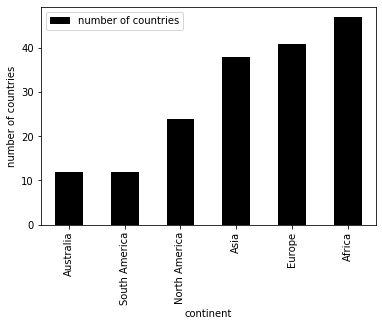

In [31]:
#Q17: How many countries are in each continent? (answer with a plot)
num_countries_by_continents = num_countries_by_continents.set_index("continent")
countries_bar_ax = num_countries_by_continents.plot.bar(color = "0")
countries_bar_ax.set_ylabel("number of countries")
countries_bar_ax.set_xlabel("continent")

In [32]:
#Q18: What is the total area of each continent?
continent_area = qry("""
SELECT continent, SUM(area) AS "total area"
FROM countries
GROUP BY continent
ORDER BY "total area" DESC
""")
continent_area

,continent,total area
0,Asia,29731231
1,Africa,25199550
2,Europe,23708430
3,North America,22327685
4,South America,17715335
5,Australia,8488612


Text(0.5, 0, 'continent')

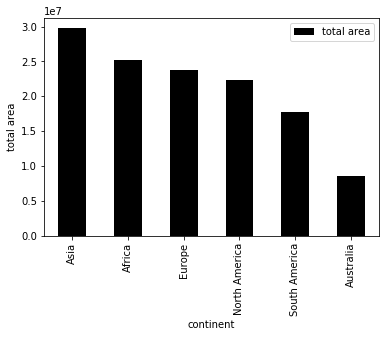

In [33]:
#Q19: What is the total area of each continent? (answer with a plot)
continent_area = continent_area.set_index("continent")
countries_bar_ax = continent_area.plot.bar(color = "0")
countries_bar_ax.set_ylabel("total area")
countries_bar_ax.set_xlabel("continent")

In [34]:
#Q20: What is the area of each country in South America?
qry("""
SELECT country, area
FROM countries
WHERE "continent" = "South America"
ORDER BY "area" DESC
""")

,country,area
0,Brazil,8511965
1,Argentina,2766890
2,Peru,1285220
3,Colombia,1138910
4,Bolivia,1098580
5,Venezuela,912050
6,Chile,756950
7,Paraguay,406750
8,Ecuador,283560
9,Guyana,214970


In [35]:
#Q21: What are the top 8 countries that have the largest real GDP?
gdp_of_top_8_countries = qry("""
SELECT country, cast("population" * "gdp-per-capita"  / 1000000000 as float) AS "real GDP (billion)"
FROM countries
ORDER BY "real GDP (billion)" DESC
LIMIT 8
""")
gdp_of_top_8_countries

,country,real GDP (billion)
0,United States,11281.0
1,China,6569.0
2,Japan,3594.0
3,India,3176.0
4,Germany,2274.0
5,France,1680.0
6,United Kingdom,1678.0
7,Italy,1552.0


In [36]:
gdp_of_top_8_countries["real GDP (billion)"].sum()

31804.0

In [37]:
total_gdp = qry("""
SELECT SUM(cast("population" * "gdp-per-capita"as float) / 1000000000) AS "real GDP (billion)"
FROM countries
ORDER BY "real GDP (billion)" 
""")
total_gdp

,real GDP (billion)
0,51204.73523


In [38]:
total_gdp.iloc[0]["real GDP (billion)"] - gdp_of_top_8_countries["real GDP (billion)"].sum()

19400.735229699967

In [39]:
new_gdp = gdp_of_top_8_countries.set_index('country')
new_total_gdp = new_gdp["real GDP (billion)"].iloc[:8]
new_total_gdp["Others"] = total_gdp.iloc[0]["real GDP (billion)"] - gdp_of_top_8_countries["real GDP (billion)"].sum()
new_total_gdp

country
United States     11281.00000
China              6569.00000
Japan              3594.00000
India              3176.00000
Germany            2274.00000
France             1680.00000
United Kingdom     1678.00000
Italy              1552.00000
Others            19400.73523
Name: real GDP (billion), dtype: float64

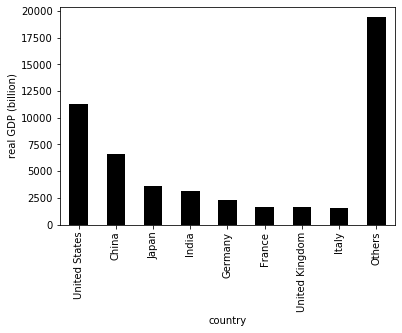

In [40]:
#Q22: What are the top 8 countries that have the largest real GDP? (answer with a plot)
new_total_gdp_ax = new_total_gdp.plot.bar(color = "0")
new_total_gdp_ax.set_xlabel("country")
new_total_gdp_ax.set_ylabel("real GDP (billion)")
new_total_gdp_ax

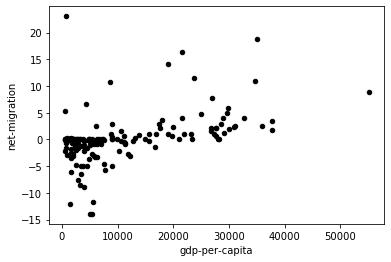

In [41]:
#Q23: What is the relationship between GDP per capita and net-migration?
gdp_migration_df = qry("""
SELECT "gdp-per-capita", "net-migration"
FROM countries
""")
gdp_migration_df.plot.scatter(x = "gdp-per-capita", y = "net-migration", color = "0")

In [42]:
#Q24: What is the correlation between GDP per capita and net-migration?
gdp_migration_df.corr().loc["net-migration"].iloc[0]

0.4523211325011283

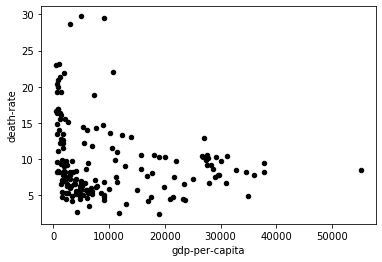

In [43]:
#Q25: What is the relationship between GDP per capita and death rates?:
gdp_deathrate_df = qry("""
SELECT "gdp-per-capita", "death-rate"
FROM countries
""")
gdp_deathrate_df.plot.scatter(x = "gdp-per-capita", y = "death-rate", color = "0")

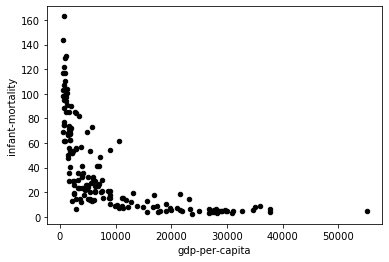

In [44]:
#Q26: What is the relationship between GDP per capita and infant-mortality?
gdp_infantmortality_df = qry("""
SELECT "gdp-per-capita", "infant-mortality"
FROM countries
""")
gdp_infantmortality_df.plot.scatter(x = "gdp-per-capita", y = "infant-mortality", color = "0")

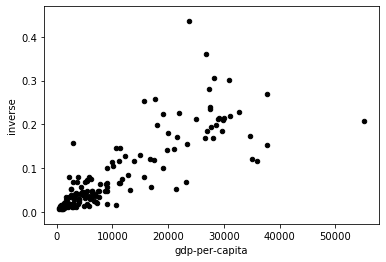

In [45]:
#Q27: What is the relationship between GDP per capita and inverse of infant-mortality?
inverse_gdp_infantmortality_df = qry("""
SELECT "gdp-per-capita", (1 / "infant-mortality") AS "inverse"
FROM countries
""")
inverse_gdp_infantmortality_df.plot.scatter(x = "gdp-per-capita", y = "inverse", color = "0")

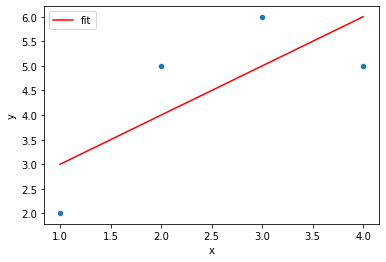

In [46]:
import numpy as np
df = DataFrame({
    "x": [1,2,3,4],
    "y": [2,5,6,5]
})
df["1"] = 1

res = np.linalg.lstsq(df[["x", "1"]], df["y"], rcond=None)

# res is a tuple: (COEFFICIENTS, VALUE, VALUE, VALUE)
coefficients = res[0] # coefficients is (m,n:
m = coefficients[0] # slope
n = coefficients[1] # intercept
ax = df.plot.scatter(x='x', y='y')

df["fit"] = df["x"] * m + n
df.plot.line(x='x', y='fit', c='red', ax=ax)

In [47]:
#Q28: fit a y = m * x + n line to the scatter plot in question 27 using the least-squares method; what are the coefficients m and n?
inverse_gdp_infantmortality_df["1"] = 1

res = np.linalg.lstsq(inverse_gdp_infantmortality_df[["gdp-per-capita", "1"]], inverse_gdp_infantmortality_df["inverse"], rcond=None)

# res is a tuple: (COEFFICIENTS, VALUE, VALUE, VALUE)
coefficients = res[0] # coefficients is (m,n:
m = coefficients[0] # slope
n = coefficients[1] # intercept
tuple(coefficients)

(6.482983154848298e-06, 0.013237849092120857)

In [48]:
#Q29: When gdp-per-capita = 50000, what is the expected value for infant-mortality?
pinned_gdp = m * 50000 + n
expected_mortality = 1 / pinned_gdp
expected_mortality

2.9639552790793418

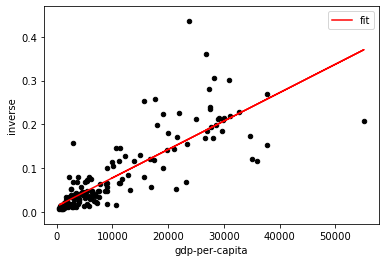

In [49]:
#Q30: plot the regression line to the scatter plot
ax = inverse_gdp_infantmortality_df.plot.scatter(x='gdp-per-capita', y='inverse', color = "0")
inverse_gdp_infantmortality_df["fit"] = inverse_gdp_infantmortality_df["gdp-per-capita"] * m + n
inverse_gdp_infantmortality_df.plot.line(x='gdp-per-capita', y='fit', c='red', ax=ax)

In [50]:
conn.close()